In [1]:
import os
os.chdir("/home/oem/Desktop/iNeuron/ML/LogisticRegression/")
!ls

 ActivityRecognitionLogisticRegression
 AReM
 AReM.zip
 LogisticRegression.ipynb
'Logistics Regression - Activity Recognition.ipynb'
'Logistics regression implementation.ipynb'


In [2]:
import os
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [3]:
df = pd.DataFrame()

DIR = os.getcwd() + '/AReM'
listofdir = ['bending1','bending2','cycling','lying','sitting','standing','walking']

for dirs in listofdir:
    os.chdir(DIR+ "/"+ dirs)
    files = os.listdir()
    for file in files:
        df_new = pd.read_csv(file, header=4, on_bad_lines='skip')
        df_new['label'] = dirs
        df = pd.concat([df, df_new],ignore_index=True)
    
    os.chdir(os.getcwd() + "/..")
    df.drop('# Columns: time',axis =1, inplace=True)
if not("concatenatedData.csv" in os.listdir()):
    df.to_csv("concatenatedData.csv")
    

In [4]:
df.profile_report().to_widgets()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Missing Values

In [5]:
columns = list(df.columns)
for column in columns:
    if column != 'label':
        df[column] = df[column].fillna(df[column].mean())

# Zero Value

In [6]:
columns = list(df.columns)
for column in columns:
    if column != 'label':
        df[column] = df[column].replace(0, df[column].mean())

# Dataset Outliers

<AxesSubplot:>

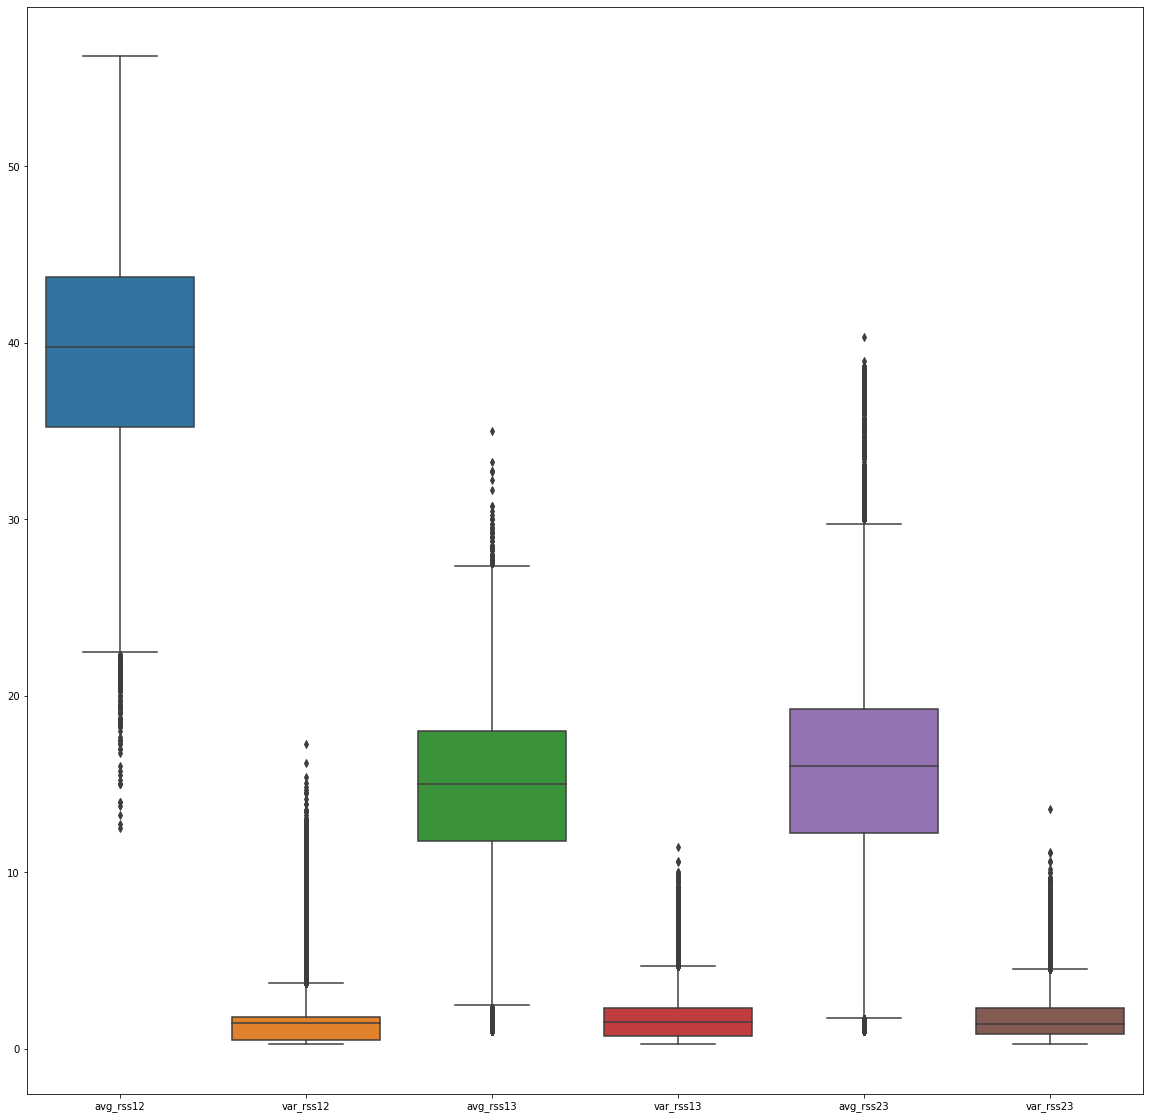

In [7]:
fig,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [8]:
q = df['var_rss13'].quantile(.95)
df_new = df[df['var_rss13']< q]

q = df_new['avg_rss12'].quantile(.02)
df_new = df_new[df_new['avg_rss12'] > q]

q = df_new['avg_rss13'].quantile(.03)
df_new = df_new[df_new['avg_rss13'] > q]

q = df_new['avg_rss13'].quantile(.99)
df_new = df_new[df_new['avg_rss13'] < q]

q = df_new['avg_rss23'].quantile(.02)
df_new = df_new[df_new['avg_rss23'] > q]

q = df_new['avg_rss23'].quantile(.95)
df_new = df_new[df_new['avg_rss23'] < q]

q = df_new['var_rss12'].quantile(.93)
df_new = df_new[df_new['var_rss12'] < q]

q = df_new['var_rss23'].quantile(.95)
df_new = df_new[df_new['var_rss23'] < q]


<AxesSubplot:>

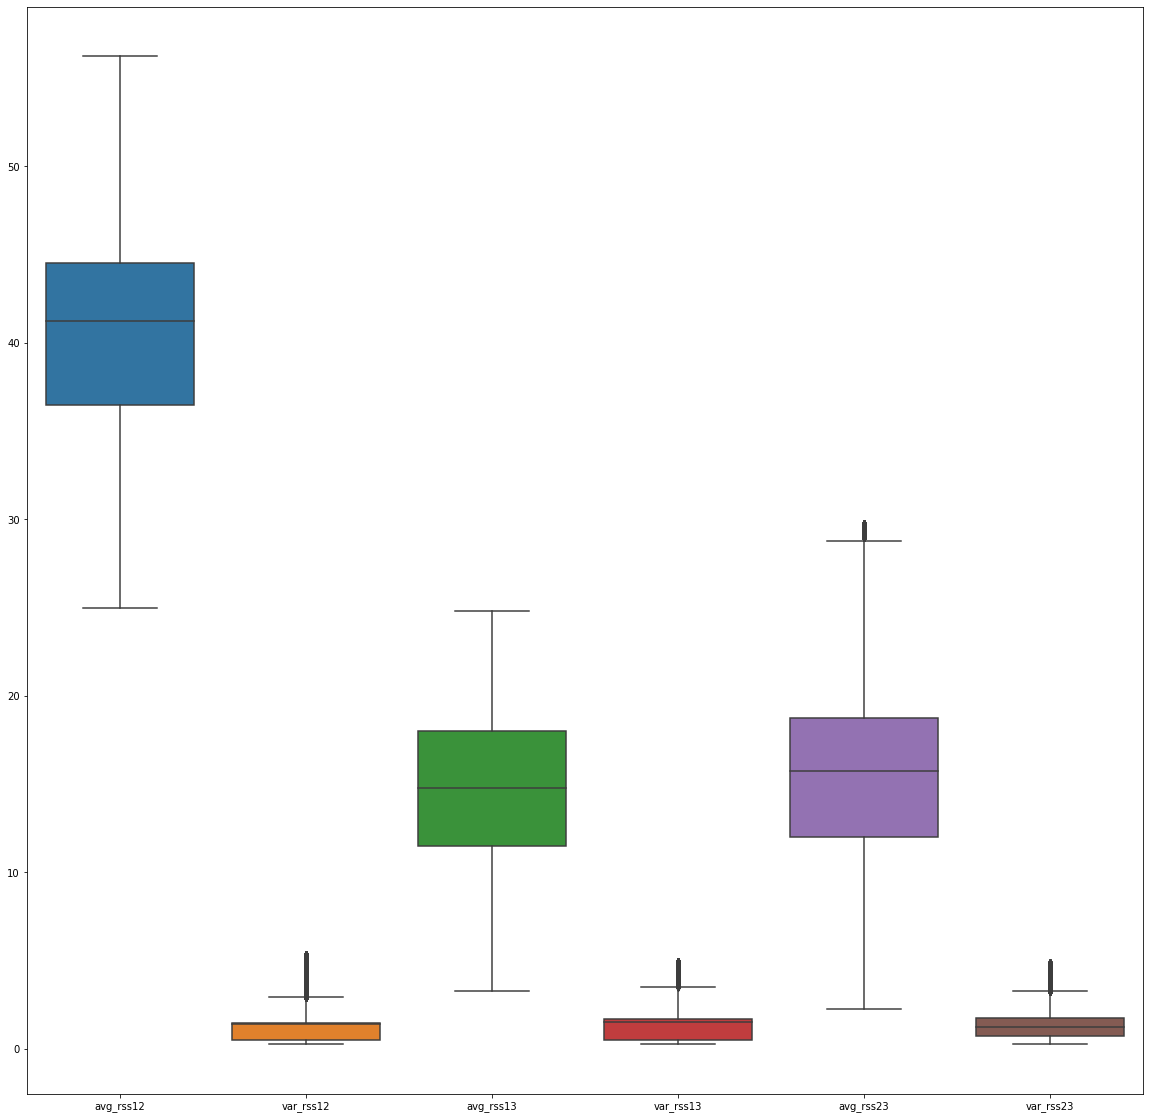

In [9]:
fig,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [10]:
y = df_new['label']
x = df_new.drop(columns=['label'])

# Check Multi-Collinearity

In [32]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])
score = vif_score(x)

In [12]:
scaler = StandardScaler()
arr = scaler.fit_transform(x)

# Train & Test Split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(arr , y , test_size = .20 , random_state = 144)

In [47]:
y_new = label_binarize(y_test, classes=['bending1','bending2','cycling','lying','sitting','standing','walking'])

In [48]:
y_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [15]:
len(arr)

30873

# LibLinear

In [16]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [17]:
logr_liblinear.fit(x_train,y_train)

[LibLinear]iter  1 act 1.208e+04 pre 1.070e+04 delta 2.130e+00 f 1.712e+04 |g| 1.153e+04 CG   1
iter  2 act 1.816e+03 pre 1.437e+03 delta 2.130e+00 f 5.043e+03 |g| 2.693e+03 CG   2
iter  3 act 7.676e+02 pre 6.003e+02 delta 2.130e+00 f 3.227e+03 |g| 9.948e+02 CG   2
iter  4 act 3.126e+02 pre 2.503e+02 delta 2.130e+00 f 2.459e+03 |g| 4.015e+02 CG   2
iter  5 act 8.839e+01 pre 7.430e+01 delta 2.130e+00 f 2.146e+03 |g| 1.549e+02 CG   3
iter  6 act 1.128e+01 pre 1.031e+01 delta 2.130e+00 f 2.058e+03 |g| 4.792e+01 CG   3
iter  7 act 2.849e-01 pre 2.801e-01 delta 2.130e+00 f 2.047e+03 |g| 8.040e+00 CG   5
iter  8 act 2.697e-04 pre 2.695e-04 delta 2.130e+00 f 2.046e+03 |g| 2.837e-01 CG   5
iter  1 act 1.084e+04 pre 9.686e+03 delta 2.017e+00 f 1.712e+04 |g| 1.091e+04 CG   1
iter  2 act 1.520e+03 pre 1.230e+03 delta 2.017e+00 f 6.275e+03 |g| 2.488e+03 CG   2
iter  3 act 3.950e+02 pre 3.326e+02 delta 2.017e+00 f 4.756e+03 |g| 8.347e+02 CG   2
iter  4 act 5.569e+01 pre 5.020e+01 delta 2.017e+00 f 

LogisticRegression(solver='liblinear', verbose=1)

In [18]:
logr_liblinear.predict_proba([x_test[1]])

array([[0.00976692, 0.0106145 , 0.61818963, 0.00106514, 0.04224994,
        0.01048014, 0.30763372]])

In [19]:
logr_liblinear.predict([x_test[1]])

array(['cycling'], dtype=object)

In [20]:
logr_liblinear.predict_log_proba([x_test[1]])
#['bending1','bending2','cycling','lying','sitting','standing','walking']

array([[-4.62875406, -4.54553426, -0.48096002, -6.84464772, -3.16415234,
        -4.55827344, -1.17884541]])

In [21]:
y_test.iloc[1]

'cycling'

In [22]:
y_pred_liblinear = logr_liblinear.predict(x_test)
y_pred_prob = logr_liblinear.predict_log_proba(x_test)

# Accuracy

In [23]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_liblinear)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 90   1  11   2 124  14   0]
 [ 16 216  19  41 125   1   7]
 [  1  15 588  11 107  22 204]
 [  0  38   2 857  46 119   0]
 [ 27  78  38 249 577 459   1]
 [  4   1   8 185 288 916   2]
 [  0  15 246   2  25   7 370]]


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_liblinear)))


Accuracy: 0.59



In [25]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_liblinear, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_liblinear, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_liblinear, average='micro')))

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59



In [26]:
print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_liblinear, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_liblinear, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_liblinear, average='macro')))

Macro Precision: 0.60
Macro Recall: 0.56
Macro F1-score: 0.57



In [27]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_liblinear, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_liblinear, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_liblinear, average='weighted')))

Weighted Precision: 0.58
Weighted Recall: 0.59
Weighted F1-score: 0.58


In [28]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_liblinear, target_names=['bending1','bending2','cycling','lying','sitting','standing','walking']))


Classification Report

              precision    recall  f1-score   support

    bending1       0.65      0.37      0.47       242
    bending2       0.59      0.51      0.55       425
     cycling       0.64      0.62      0.63       948
       lying       0.64      0.81      0.71      1062
     sitting       0.45      0.40      0.42      1429
    standing       0.60      0.65      0.62      1404
     walking       0.63      0.56      0.59       665

    accuracy                           0.59      6175
   macro avg       0.60      0.56      0.57      6175
weighted avg       0.58      0.59      0.58      6175



In [29]:
auc = roc_auc_score(y_new, y_pred_prob)
print("Area under the curve ", auc)

Area under the curve  0.9000669061056493


# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

In [30]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [31]:
for solver in solver_list:
    print("\033[1m", "\033[94m", "Solver: ", solver, "\033[0m","\n")
    logr = LogisticRegression(verbose=1,solver=solver)
    logr.fit(x_train,y_train)
    y_pred = logr.predict(x_test)
    y_pred_prob = logr.predict_log_proba(x_test)
    print('\nDefault Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_liblinear)))
    
    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_liblinear, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_liblinear, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_liblinear, average='micro')))
    
    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_liblinear, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_liblinear, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_liblinear, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_liblinear, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_liblinear, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_liblinear, average='weighted')))

    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred_liblinear, target_names=['bending1','bending2','cycling','lying','sitting','standing','walking']))

  Solver:  newton-cg  



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished



Default Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.60
Macro Recall: 0.56
Macro F1-score: 0.57

Weighted Precision: 0.58
Weighted Recall: 0.59
Weighted F1-score: 0.58

Classification Report

              precision    recall  f1-score   support

    bending1       0.65      0.37      0.47       242
    bending2       0.59      0.51      0.55       425
     cycling       0.64      0.62      0.63       948
       lying       0.64      0.81      0.71      1062
     sitting       0.45      0.40      0.42      1429
    standing       0.60      0.65      0.62      1404
     walking       0.63      0.56      0.59       665

    accuracy                           0.59      6175
   macro avg       0.60      0.56      0.57      6175
weighted avg       0.58      0.59      0.58      6175

  Solver:  lbfgs  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           49     M =           10

At X0         0 variab

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  2.41415D+04    |proj g|=  3.39210D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   49     50     54      1     0     0   3.392D-01   2.414D+04
  F =   24141.539880705954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

Default Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.60
Macro Recall: 0.56
Macro F1-score: 0.57

Weighted Precision: 0.58
Weighted Recall: 0.59


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Weighted F1-score: 0.58

Classification Report

              precision    recall  f1-score   support

    bending1       0.65      0.37      0.47       242
    bending2       0.59      0.51      0.55       425
     cycling       0.64      0.62      0.63       948
       lying       0.64      0.81      0.71      1062
     sitting       0.45      0.40      0.42      1429
    standing       0.60      0.65      0.62      1404
     walking       0.63      0.56      0.59       665

    accuracy                           0.59      6175
   macro avg       0.60      0.56      0.57      6175
weighted avg       0.58      0.59      0.58      6175

  Solver:  liblinear  

[LibLinear]iter  1 act 1.208e+04 pre 1.070e+04 delta 2.130e+00 f 1.712e+04 |g| 1.153e+04 CG   1
iter  2 act 1.816e+03 pre 1.437e+03 delta 2.130e+00 f 5.043e+03 |g| 2.693e+03 CG   2
iter  3 act 7.676e+02 pre 6.003e+02 delta 2.130e+00 f 3.227e+03 |g| 9.948e+02 CG   2
iter  4 act 3.126e+02 pre 2.503e+02 delta 2.130e+00 f 2.459e+03 |

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 38 epochs took 1 seconds

Default Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59

Macro Precision: 0.60
Macro Recall: 0.56
Macro F1-score: 0.57

Weighted Precision: 0.58
Weighted Recall: 0.59
Weighted F1-score: 0.58

Classification Report



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


              precision    recall  f1-score   support

    bending1       0.65      0.37      0.47       242
    bending2       0.59      0.51      0.55       425
     cycling       0.64      0.62      0.63       948
       lying       0.64      0.81      0.71      1062
     sitting       0.45      0.40      0.42      1429
    standing       0.60      0.65      0.62      1404
     walking       0.63      0.56      0.59       665

    accuracy                           0.59      6175
   macro avg       0.60      0.56      0.57      6175
weighted avg       0.58      0.59      0.58      6175

  Solver:  saga  

convergence after 16 epochs took 0 seconds

Default Accuracy: 0.59

Micro Precision: 0.59
Micro Recall: 0.59
Micro F1-score: 0.59



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Macro Precision: 0.60
Macro Recall: 0.56
Macro F1-score: 0.57

Weighted Precision: 0.58
Weighted Recall: 0.59
Weighted F1-score: 0.58

Classification Report

              precision    recall  f1-score   support

    bending1       0.65      0.37      0.47       242
    bending2       0.59      0.51      0.55       425
     cycling       0.64      0.62      0.63       948
       lying       0.64      0.81      0.71      1062
     sitting       0.45      0.40      0.42      1429
    standing       0.60      0.65      0.62      1404
     walking       0.63      0.56      0.59       665

    accuracy                           0.59      6175
   macro avg       0.60      0.56      0.57      6175
weighted avg       0.58      0.59      0.58      6175

